In [1]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords 
%matplotlib inline

In [2]:
import pickle

In [3]:
gram_no_tfidf_title_multi = pickle.load(open('gram_no_tfidf_title_sentiment_multi_normal_5.sav', 'rb'))
gram_tfidf_title_multi = pickle.load(open('gram_tfidf_title_sentiment_multi_normal_5.sav', 'rb'))
gram_no_tfidf_review_multi = pickle.load(open('gram_no_tfidf_review_sentiment_multi_normal_5.sav', 'rb'))
gram_tfidf_review_multi = pickle.load(open('gram_tfidf_review_sentiment_multi_normal_5.sav', 'rb'))
gram_no_tfidf_combination_multi = pickle.load(open('gram_no_tfidf_combination_sentiment_multi_normal_5.sav', 'rb'))
gram_tfidf_combination_multi = pickle.load(open('gram_tfidf_combination_sentiment_multi_normal_5.sav', 'rb'))

## Error value in various gram scenario

In [4]:
def create_error_gram_df_notfidf_multi(df, name =''):
    matrix_gram = ['1','1','1','1','1','2','2','2','2','2','3','3','3','3','3']
    matrix_train = []
    matrix_test = []
    model = pd.Series([])
    model_series = pd.Series(['model_1vR_no_tfidf_{}'.format(name), 
                          'model_multi_no_tfidf_{}'.format(name), 
                          'model_ordinal_no_tfidf_{}'.format(name), 
                          'model_rfc_no_tfidf_{}'.format(name), 
                          'model_NB_no_tfidf_{}'.format(name)], name = 'Model')

    for i in range(len(df)):
        model = pd.concat([model, model_series])
        for k in df[i].keys():
            if k == 'train_error':
                for m in range(len(df[i]['train_error'])):
                    matrix_train.append([df[i]['train_error'][m]['f1'],
                                     df[i]['train_error'][m]['accuracy'], 
                                     df[i]['train_error'][m]['logloss']])
            
            else:
                 for n in range(len(df[i]['test_error'])):
                    matrix_test.append([df[i]['test_error'][n]['f1'],
                                        df[i]['test_error'][n]['accuracy'], 
                                        df[i]['test_error'][n]['logloss']])
                    
    model.index = range(0,15)
    return pd.concat([pd.Series(matrix_gram, name = 'Gram'), model.rename('Model'),
                       pd.DataFrame(matrix_train, columns = ['F1 Train', 
                                                             'Accuracy Train', 
                                                             'Log Loss Train'
                                                            ]),
                       pd.DataFrame(matrix_test, columns = ['F1 Test', 
                                                            'Accuracy Test', 
                                                            'Log Loss Test'])], axis =1)
        
create_error_gram_df_notfidf_multi(gram_no_tfidf_title_multi, name = 'title')                

,Gram,Model,F1 Train,Accuracy Train,Log Loss Train,F1 Test,Accuracy Test,Log Loss Test
0,1,model_1vR_no_tfidf_title,0.626779,0.673824,0.763904,0.566986,0.621589,0.844220
1,1,model_multi_no_tfidf_title,0.629386,0.654913,0.776175,0.568364,0.598877,0.866820
2,1,model_ordinal_no_tfidf_title,0.580728,0.610234,0.786297,0.544466,0.570603,0.887074
3,1,model_rfc_no_tfidf_title,0.874711,0.887834,0.360690,0.554088,0.618658,1.294295
4,1,model_NB_no_tfidf_title,0.598164,0.665098,0.759226,0.557896,0.631863,0.842702
5,2,model_1vR_no_tfidf_title,0.633502,0.677728,0.746069,0.574424,0.626685,0.831958
6,2,model_multi_no_tfidf_title,0.634552,0.657879,0.758665,0.573990,0.602055,0.858410
7,2,model_ordinal_no_tfidf_title,0.586403,0.614029,0.772689,0.551948,0.576904,0.866836
8,2,model_rfc_no_tfidf_title,0.861214,0.875368,0.378236,0.549141,0.616986,1.276607
9,2,model_NB_no_tfidf_title,0.605069,0.665263,0.766415,0.567385,0.635068,0.854988


In [5]:
def create_error_gram_df_tfidf_multi(df, name =''):
    matrix_gram = ['1','1','1','1','1','2','2','2','2','2','3','3','3','3','3' ]
    matrix_train = []
    matrix_test = []
    model = pd.Series([])
    model_series = pd.Series(['model_1vR_tfidf_{}'.format(name), 
                          'model_multi_tfidf_{}'.format(name), 
                          'model_ordinal_tfidf_{}'.format(name), 
                          'model_rfc_tfidf_{}'.format(name), 
                          'model_NB_tfidf_{}'.format(name)], name = 'Model')

    for i in range(len(df)):
        model = pd.concat([model, model_series])
        for k in df[i].keys():
            if k == 'train_error':
                for m in range(len(df[i]['train_error'])):
                    matrix_train.append([df[i]['train_error'][m]['f1'],
                                     df[i]['train_error'][m]['accuracy'], 
                                     df[i]['train_error'][m]['logloss']])
            
            else:
                 for n in range(len(df[i]['test_error'])):
                    matrix_test.append([df[i]['test_error'][n]['f1'],
                                        df[i]['test_error'][n]['accuracy'], 
                                        df[i]['test_error'][n]['logloss']])
                    
    model.index = range(0,15)
    return pd.concat([pd.Series(matrix_gram, name = 'Gram'), model.rename('Model'),
                       pd.DataFrame(matrix_train, columns = ['F1 Train', 
                                                             'Accuracy Train', 
                                                             'Log Loss Train'
                                                            ]),
                       pd.DataFrame(matrix_test, columns = ['F1 Test', 
                                                            'Accuracy Test', 
                                                            'Log Loss Test'])], axis =1)
        
create_error_gram_df_tfidf_multi(gram_tfidf_title_multi, name = 'title')                

,Gram,Model,F1 Train,Accuracy Train,Log Loss Train,F1 Test,Accuracy Test,Log Loss Test
0,1,model_1vR_tfidf_title,0.624607,0.671208,0.781518,0.566889,0.621315,0.840559
1,1,model_multi_tfidf_title,0.624893,0.647077,0.797069,0.569201,0.595452,0.862248
2,1,model_ordinal_tfidf_title,0.579810,0.608871,0.787770,0.541927,0.567644,0.882385
3,1,model_rfc_tfidf_title,0.873830,0.887046,0.361374,0.549900,0.622685,1.179537
4,1,model_NB_tfidf_title,0.565838,0.661475,0.779051,0.528153,0.628932,0.834798
5,2,model_1vR_tfidf_title,0.629792,0.674352,0.766930,0.573965,0.626000,0.828778
6,2,model_multi_tfidf_title,0.632397,0.655550,0.779828,0.574791,0.602986,0.850553
7,2,model_ordinal_tfidf_title,0.584265,0.612549,0.771986,0.548346,0.573726,0.862870
8,2,model_rfc_tfidf_title,0.860468,0.874717,0.378915,0.550772,0.623589,1.201069
9,2,model_NB_tfidf_title,0.577587,0.665893,0.761621,0.543064,0.637315,0.818737


In [6]:
gram_error_multi_title = pd.concat([create_error_gram_df_notfidf_multi(gram_no_tfidf_title_multi, name = 'title') ,
                                   create_error_gram_df_tfidf_multi(gram_tfidf_title_multi, name = 'title') ])

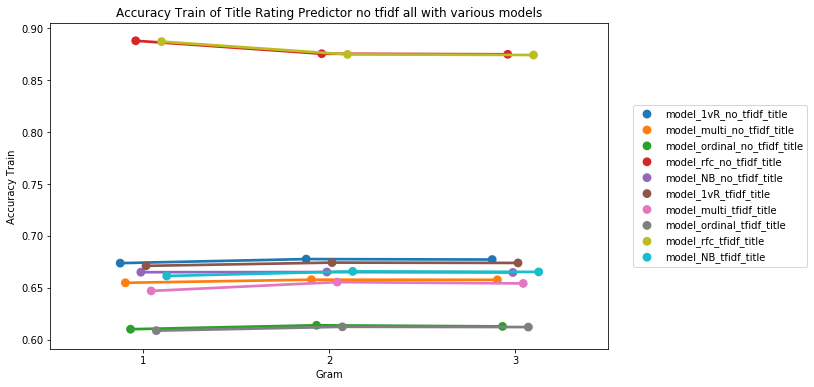

In [46]:
plt.figure(figsize = (10,6))
sns.pointplot(x = 'Gram', y = 'Accuracy Train', hue = 'Model', data = gram_error_multi_title, dodge = True )
plt.title('Accuracy Train of Title Rating Predictor no tfidf all with various models')
plt.legend(bbox_to_anchor=[1.20, 0.5], loc ='center')

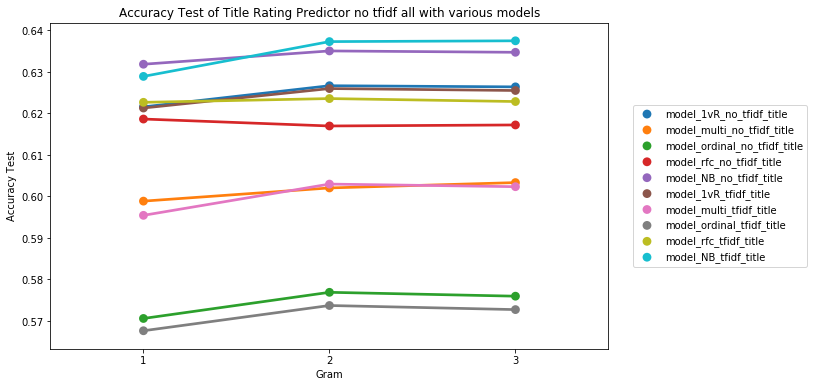

In [8]:
plt.figure(figsize = (10,6))
sns.pointplot(x = 'Gram', y = 'Accuracy Test', hue = 'Model', data = gram_error_multi_title)
plt.title('Accuracy Test of Title Rating Predictor no tfidf all with various models')
plt.legend(bbox_to_anchor=[1.20, 0.5], loc ='center')

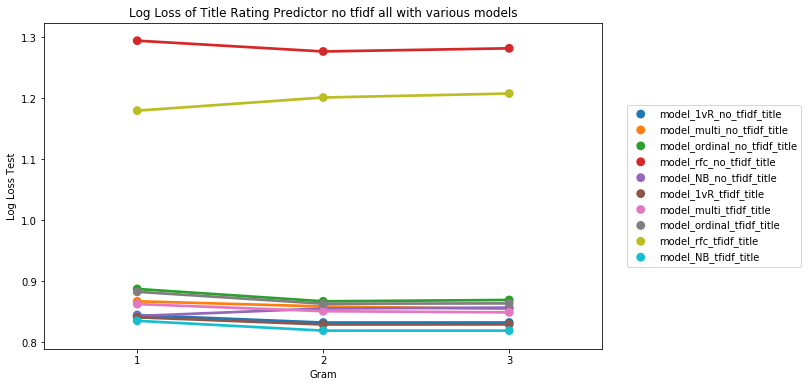

In [9]:
plt.figure(figsize = (10,6))
sns.pointplot(x = 'Gram', y = 'Log Loss Test', hue = 'Model', data = gram_error_multi_title)
plt.title('Log Loss of Title Rating Predictor no tfidf all with various models')
plt.legend(bbox_to_anchor=[1.20, 0.5], loc ='center')

In [10]:
create_error_gram_df_notfidf_multi(gram_no_tfidf_review_multi, name = 'review')     

,Gram,Model,F1 Train,Accuracy Train,Log Loss Train,F1 Test,Accuracy Test,Log Loss Test
0,1,model_1vR_no_tfidf_review,0.692076,0.735291,0.656096,0.615005,0.668575,0.803251
1,1,model_multi_no_tfidf_review,0.695805,0.721250,0.664722,0.614657,0.647288,0.835705
2,1,model_ordinal_no_tfidf_review,0.624786,0.667804,0.717669,0.587635,0.629644,0.809609
3,1,model_rfc_no_tfidf_review,0.999969,0.999973,0.207830,0.520563,0.660000,0.826743
4,1,model_NB_no_tfidf_review,0.628418,0.670687,1.035558,0.597595,0.645808,1.143794
5,2,model_1vR_no_tfidf_review,0.704335,0.746538,0.631476,0.627796,0.680164,0.773051
6,2,model_multi_no_tfidf_review,0.707977,0.733599,0.637157,0.626671,0.659699,0.811286
7,2,model_ordinal_no_tfidf_review,0.634192,0.678037,0.697411,0.596706,0.640411,0.784752
8,2,model_rfc_no_tfidf_review,0.999960,0.999966,0.204736,0.523193,0.661890,0.819110
9,2,model_NB_no_tfidf_review,0.639339,0.678139,1.087079,0.614830,0.657836,1.176847


In [11]:
create_error_gram_df_tfidf_multi(gram_tfidf_review_multi, name = 'review')     

,Gram,Model,F1 Train,Accuracy Train,Log Loss Train,F1 Test,Accuracy Test,Log Loss Test
0,1,model_1vR_tfidf_review,0.678510,0.725346,0.683240,0.624697,0.679699,0.746503
1,1,model_multi_tfidf_review,0.689034,0.714482,0.681703,0.627452,0.659068,0.765700
2,1,model_ordinal_tfidf_review,0.630847,0.677290,0.698390,0.592257,0.639205,0.776746
3,1,model_rfc_tfidf_review,0.999969,0.999973,0.208237,0.512765,0.657671,0.826996
4,1,model_NB_tfidf_review,0.516823,0.664632,0.816525,0.500066,0.651068,0.843094
5,2,model_1vR_tfidf_review,0.691335,0.736654,0.662780,0.637837,0.691233,0.726893
6,2,model_multi_tfidf_review,0.699286,0.724674,0.663957,0.638614,0.669973,0.743815
7,2,model_ordinal_tfidf_review,0.639764,0.687420,0.677977,0.603582,0.651178,0.754566
8,2,model_rfc_tfidf_review,0.999969,0.999973,0.205151,0.519994,0.662740,0.814714
9,2,model_NB_tfidf_review,0.549110,0.681831,0.777991,0.530816,0.668493,0.802484


In [12]:
gram_error_multi_review = pd.concat([create_error_gram_df_notfidf_multi(gram_no_tfidf_review_multi, name = 'review') ,
                                   create_error_gram_df_tfidf_multi(gram_tfidf_review_multi, name = 'review') ])

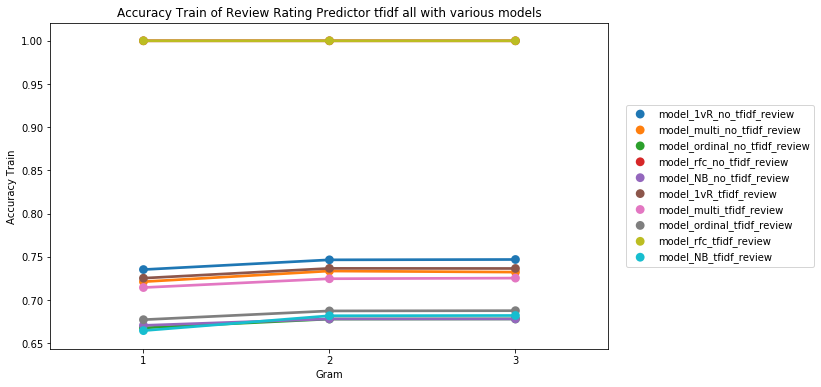

In [13]:
plt.figure(figsize = (10,6))
sns.pointplot(x = 'Gram', y = 'Accuracy Train', hue = 'Model', data = gram_error_multi_review)
plt.title('Accuracy Train of Review Rating Predictor tfidf all with various models')
plt.legend(bbox_to_anchor=[1.20, 0.5], loc ='center')

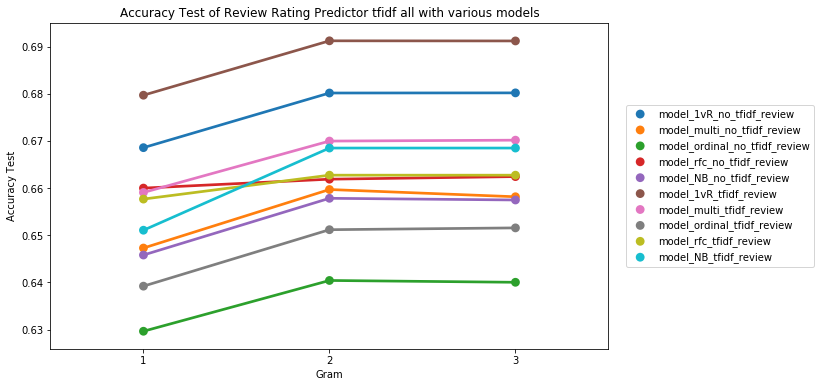

In [14]:
plt.figure(figsize = (10,6))
sns.pointplot(x = 'Gram', y = 'Accuracy Test', hue = 'Model', data = gram_error_multi_review)
plt.title('Accuracy Test of Review Rating Predictor tfidf all with various models')
plt.legend(bbox_to_anchor=[1.20, 0.5], loc ='center')

In [15]:
create_error_gram_df_notfidf_multi(gram_no_tfidf_combination_multi, name = 'combination')     

,Gram,Model,F1 Train,Accuracy Train,Log Loss Train,F1 Test,Accuracy Test,Log Loss Test
0,1,model_1vR_no_tfidf_combination,0.717694,0.758538,0.605803,0.647653,0.700000,0.740048
1,1,model_multi_no_tfidf_combination,0.723278,0.748181,0.610429,0.645775,0.679425,0.775098
2,1,model_ordinal_no_tfidf_combination,0.649050,0.695229,0.671516,0.613572,0.660904,0.754209
3,1,model_rfc_no_tfidf_combination,0.999983,0.999986,0.197931,0.552259,0.682795,0.781216
4,1,model_NB_no_tfidf_combination,0.656496,0.694941,1.015782,0.631346,0.675699,1.104789
5,2,model_1vR_no_tfidf_combination,0.730359,0.769490,0.581410,0.658132,0.709644,0.712328
6,2,model_multi_no_tfidf_combination,0.734209,0.758901,0.585279,0.656755,0.690110,0.748912
7,2,model_ordinal_no_tfidf_combination,0.657782,0.704126,0.652053,0.619900,0.668767,0.732679
8,2,model_rfc_no_tfidf_combination,0.999991,0.999993,0.194300,0.560439,0.686329,0.773408
9,2,model_NB_no_tfidf_combination,0.666590,0.701996,1.078085,0.648158,0.687644,1.149061


In [16]:
create_error_gram_df_tfidf_multi(gram_tfidf_combination_multi, name = 'combination')     

,Gram,Model,F1 Train,Accuracy Train,Log Loss Train,F1 Test,Accuracy Test,Log Loss Test
0,1,model_1vR_tfidf_combination,0.703764,0.748223,0.637748,0.660871,0.713479,0.691214
1,1,model_multi_tfidf_combination,0.712677,0.738291,0.636411,0.659123,0.691233,0.705250
2,1,model_ordinal_tfidf_combination,0.652137,0.700215,0.655909,0.618538,0.667233,0.725960
3,1,model_rfc_tfidf_combination,1.000000,1.000000,0.198611,0.549391,0.681945,0.782160
4,1,model_NB_tfidf_combination,0.542859,0.684256,0.783816,0.526397,0.674192,0.806161
5,2,model_1vR_tfidf_combination,0.716066,0.758702,0.617612,0.670195,0.722301,0.672452
6,2,model_multi_tfidf_combination,0.722383,0.748003,0.613626,0.670140,0.702192,0.684400
7,2,model_ordinal_tfidf_combination,0.663094,0.711537,0.635520,0.625513,0.676219,0.707153
8,2,model_rfc_tfidf_combination,1.000000,1.000000,0.195180,0.556801,0.685671,0.768774
9,2,model_NB_tfidf_combination,0.581034,0.703229,0.741065,0.565350,0.693562,0.758801


In [17]:
gram_error_multi_combination = pd.concat([create_error_gram_df_notfidf_multi(gram_no_tfidf_combination_multi, name = 'combination'),
                                         create_error_gram_df_tfidf_multi(gram_tfidf_combination_multi, name = 'combination')     ])

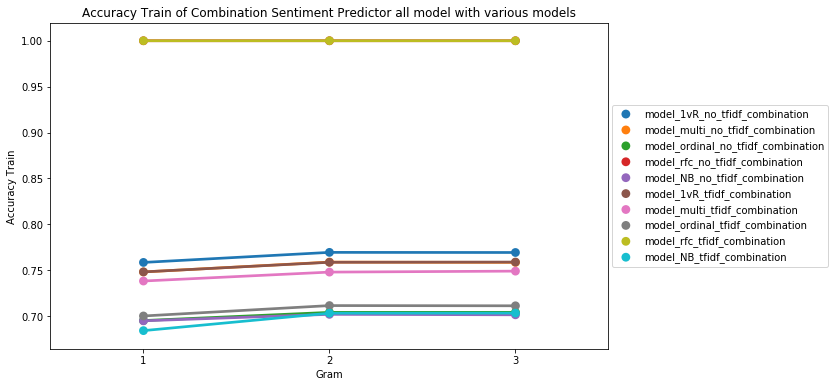

In [18]:
plt.figure(figsize = (10,6))
sns.pointplot(x = 'Gram', y = 'Accuracy Train', hue = 'Model', data = gram_error_multi_combination)
plt.title('Accuracy Train of Combination Sentiment Predictor all model with various models')
plt.legend(bbox_to_anchor=[1.20, 0.5], loc ='center')

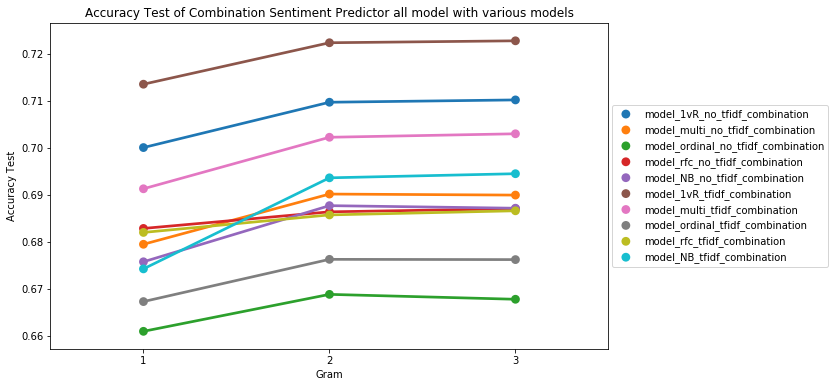

In [19]:
plt.figure(figsize = (10,6))
sns.pointplot(x = 'Gram', y = 'Accuracy Test', hue = 'Model', data = gram_error_multi_combination)
plt.title('Accuracy Test of Combination Sentiment Predictor all model with various models')
plt.legend(bbox_to_anchor=[1.20, 0.5], loc ='center')

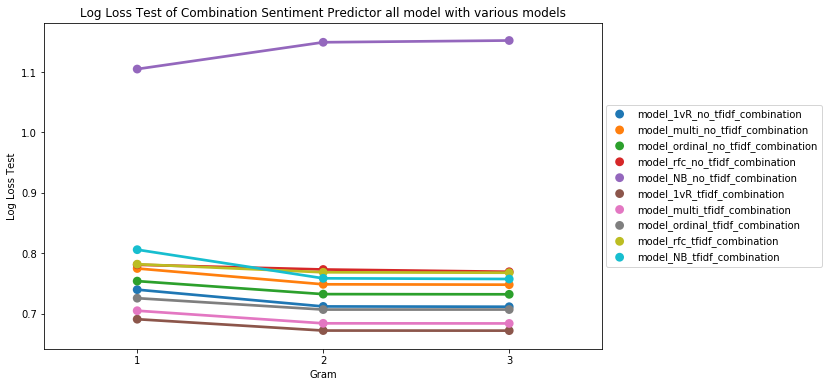

In [20]:
plt.figure(figsize = (10,6))
sns.pointplot(x = 'Gram', y = 'Log Loss Test', hue = 'Model', data = gram_error_multi_combination)
plt.title('Log Loss Test of Combination Sentiment Predictor all model with various models')
plt.legend(bbox_to_anchor=[1.20, 0.5], loc ='center')

In [21]:
gram_error = pd.concat([gram_error_multi_title, gram_error_multi_review, gram_error_multi_combination])
gram_error

,Gram,Model,F1 Train,Accuracy Train,Log Loss Train,F1 Test,Accuracy Test,Log Loss Test
0,1,model_1vR_no_tfidf_title,0.626779,0.673824,0.763904,0.566986,0.621589,0.844220
1,1,model_multi_no_tfidf_title,0.629386,0.654913,0.776175,0.568364,0.598877,0.866820
2,1,model_ordinal_no_tfidf_title,0.580728,0.610234,0.786297,0.544466,0.570603,0.887074
3,1,model_rfc_no_tfidf_title,0.874711,0.887834,0.360690,0.554088,0.618658,1.294295
4,1,model_NB_no_tfidf_title,0.598164,0.665098,0.759226,0.557896,0.631863,0.842702
5,2,model_1vR_no_tfidf_title,0.633502,0.677728,0.746069,0.574424,0.626685,0.831958
6,2,model_multi_no_tfidf_title,0.634552,0.657879,0.758665,0.573990,0.602055,0.858410
7,2,model_ordinal_no_tfidf_title,0.586403,0.614029,0.772689,0.551948,0.576904,0.866836
8,2,model_rfc_no_tfidf_title,0.861214,0.875368,0.378236,0.549141,0.616986,1.276607
9,2,model_NB_no_tfidf_title,0.605069,0.665263,0.766415,0.567385,0.635068,0.854988


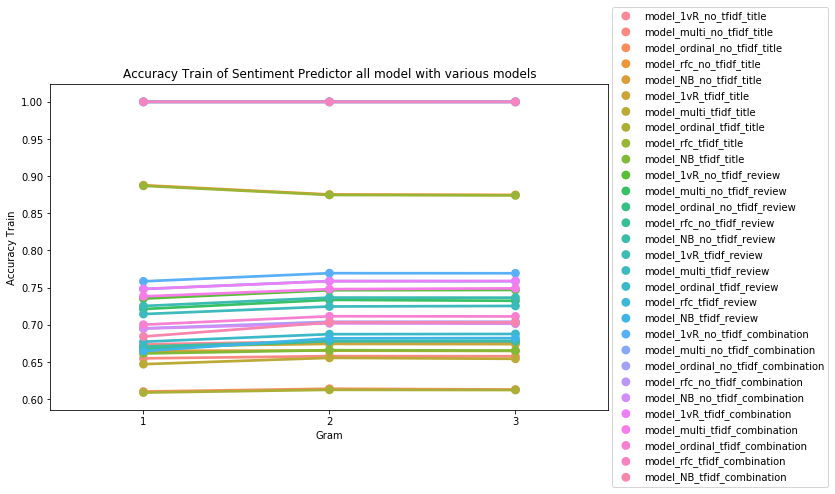

In [22]:
plt.figure(figsize = (10,6))
sns.pointplot(x = 'Gram', y = 'Accuracy Train', hue = 'Model', data = gram_error)
plt.title('Accuracy Train of Sentiment Predictor all model with various models')
plt.legend(bbox_to_anchor=[1.20, 0.5], loc ='center')

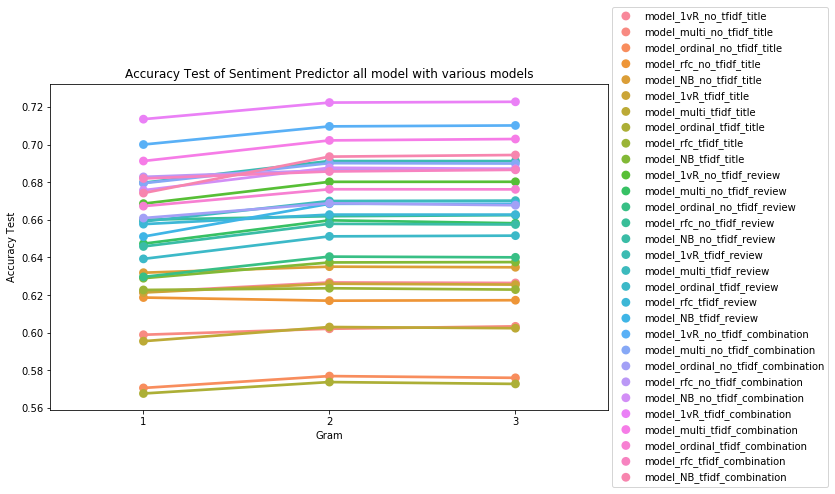

In [23]:
plt.figure(figsize = (10,6))
sns.pointplot(x = 'Gram', y = 'Accuracy Test', hue = 'Model', data = gram_error)
plt.title('Accuracy Test of Sentiment Predictor all model with various models')
plt.legend(bbox_to_anchor=[1.20, 0.5], loc ='center')

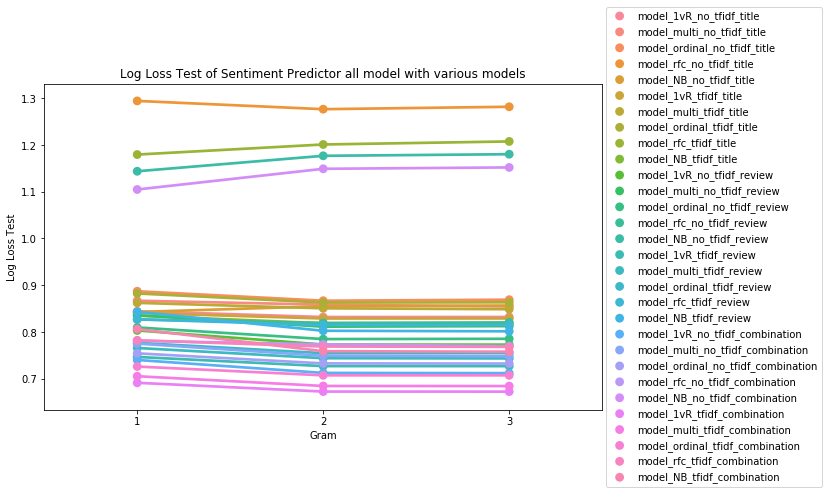

In [24]:
plt.figure(figsize = (10,6))
sns.pointplot(x = 'Gram', y = 'Log Loss Test', hue = 'Model', data = gram_error)
plt.title('Log Loss Test of Sentiment Predictor all model with various models')
plt.legend(bbox_to_anchor=[1.20, 0.5], loc ='center')

In [25]:
feature_no_tfidf_title_sentiment_multi = pickle.load(open('feature_no_tfidf_title_sentiment_multi_normal_5.sav', 'rb'))
feature_tfidf_title_sentiment_multi = pickle.load(open('feature_tfidf_title_sentiment_multi_normal_5.sav', 'rb'))
feature_no_tfidf_review_sentiment_multi = pickle.load(open('feature_no_tfidf_review_sentiment_multi_normal_5.sav', 'rb'))
feature_tfidf_review_sentiment_multi = pickle.load(open('feature_tfidf_review_sentiment_multi_normal_5.sav', 'rb'))
feature_no_tfidf_combination_sentiment_multi = pickle.load(open('feature_no_tfidf_combination_sentiment_multi_normal_5.sav', 'rb'))
feature_tfidf_combination_sentiment_multi = pickle.load(open('feature_tfidf_combination_sentiment_multi_normal_5.sav', 'rb'))

## Now, trying various number of features

In [26]:
def create_error_feature_df_notfidf_multi(df, name =''):
    feat = np.array([10000, 15000, 20000, 25000, 30000])
    matrix_feat = np.repeat(feat, 5)
    matrix_train = []
    matrix_test = []
    model = pd.Series([])
    model_series = pd.Series(['model_1vR_no_tfidf_{}'.format(name), 
                          'model_multi_no_tfidf_{}'.format(name), 
                          'model_ordinal_no_tfidf_{}'.format(name), 
                          'model_rfc_no_tfidf_{}'.format(name), 
                          'model_NB_no_tfidf_{}'.format(name)], name = 'Model')

    for i in range(len(df)):
        model = pd.concat([model, model_series])
        for k in df[i].keys():
            if k == 'train_error':
                for m in range(len(df[i]['train_error'])):
                    matrix_train.append([df[i]['train_error'][m]['f1'],
                                     df[i]['train_error'][m]['accuracy'], 
                                     df[i]['train_error'][m]['logloss']])
            
            else:
                 for n in range(len(df[i]['test_error'])):
                    matrix_test.append([df[i]['test_error'][n]['f1'],
                                        df[i]['test_error'][n]['accuracy'], 
                                        df[i]['test_error'][n]['logloss']])
                    
    model.index = range(0,25)
    return pd.concat([pd.Series(matrix_feat, name = 'Number of features'), model.rename('Model'),
                       pd.DataFrame(matrix_train, columns = ['F1 Train', 
                                                             'Accuracy Train', 
                                                             'Log Loss Train'
                                                            ]),
                       pd.DataFrame(matrix_test, columns = ['F1 Test', 
                                                            'Accuracy Test', 
                                                            'Log Loss Test'])], axis =1)
        
create_error_feature_df_notfidf_multi(feature_no_tfidf_title_sentiment_multi, name = 'title')                

,Number of features,Model,F1 Train,Accuracy Train,Log Loss Train,F1 Test,Accuracy Test,Log Loss Test
0,10000,model_1vR_no_tfidf_title,0.633502,0.677728,0.746069,0.574424,0.626685,0.831958
1,10000,model_multi_no_tfidf_title,0.634552,0.657879,0.758665,0.573990,0.602055,0.858410
2,10000,model_ordinal_no_tfidf_title,0.586403,0.614029,0.772689,0.551948,0.576904,0.866836
3,10000,model_rfc_no_tfidf_title,0.861357,0.875389,0.378443,0.549080,0.615945,1.268261
4,10000,model_NB_no_tfidf_title,0.605069,0.665263,0.766415,0.567385,0.635068,0.854988
5,15000,model_1vR_no_tfidf_title,0.652057,0.693393,0.723639,0.576790,0.628466,0.830181
6,15000,model_multi_no_tfidf_title,0.650876,0.673619,0.740415,0.577464,0.606247,0.852785
7,15000,model_ordinal_no_tfidf_title,0.602423,0.633454,0.743976,0.550427,0.578000,0.903947
8,15000,model_rfc_no_tfidf_title,0.874770,0.887868,0.359770,0.551123,0.618055,1.262074
9,15000,model_NB_no_tfidf_title,0.619271,0.677228,0.744593,0.569247,0.637315,0.858337


In [27]:
def create_error_feature_df_tfidf_multi(df, name =''):
    feat = np.array([10000, 15000, 20000, 25000, 30000])
    matrix_feat = np.repeat(feat, 5)
    matrix_train = []
    matrix_test = []
    model = pd.Series([])
    model_series = pd.Series(['model_1vR_tfidf_{}'.format(name), 
                          'model_multi_tfidf_{}'.format(name), 
                          'model_ordinal_tfidf_{}'.format(name), 
                          'model_rfc_tfidf_{}'.format(name), 
                          'model_NB_tfidf_{}'.format(name)], name = 'Model')

    for i in range(len(df)):
        model = pd.concat([model, model_series])
        for k in df[i].keys():
            if k == 'train_error':
                for m in range(len(df[i]['train_error'])):
                    matrix_train.append([df[i]['train_error'][m]['f1'],
                                     df[i]['train_error'][m]['accuracy'], 
                                     df[i]['train_error'][m]['logloss']])
            
            else:
                 for n in range(len(df[i]['test_error'])):
                    matrix_test.append([df[i]['test_error'][n]['f1'],
                                        df[i]['test_error'][n]['accuracy'], 
                                        df[i]['test_error'][n]['logloss']])
                    
    model.index = range(0,25)
    return pd.concat([pd.Series(matrix_feat, name = 'Number of features'), model.rename('Model'),
                       pd.DataFrame(matrix_train, columns = ['F1 Train', 
                                                             'Accuracy Train', 
                                                             'Log Loss Train'
                                                            ]),
                       pd.DataFrame(matrix_test, columns = ['F1 Test', 
                                                            'Accuracy Test', 
                                                            'Log Loss Test'])], axis =1)
        
create_error_feature_df_tfidf_multi(feature_tfidf_title_sentiment_multi, name = 'title')                

,Number of features,Model,F1 Train,Accuracy Train,Log Loss Train,F1 Test,Accuracy Test,Log Loss Test
0,10000,model_1vR_tfidf_title,0.629792,0.674352,0.766930,0.573965,0.626000,0.828778
1,10000,model_multi_tfidf_title,0.632397,0.655550,0.779828,0.574791,0.602986,0.850553
2,10000,model_ordinal_tfidf_title,0.584265,0.612549,0.771986,0.548346,0.573726,0.862870
3,10000,model_rfc_tfidf_title,0.860624,0.874724,0.378635,0.548920,0.622548,1.198623
4,10000,model_NB_tfidf_title,0.577587,0.665893,0.761621,0.543064,0.637315,0.818737
5,15000,model_1vR_tfidf_title,0.645634,0.688283,0.753683,0.576214,0.628000,0.827085
6,15000,model_multi_tfidf_title,0.645455,0.667297,0.761110,0.575767,0.603260,0.848003
7,15000,model_ordinal_tfidf_title,0.600124,0.631440,0.743871,0.546181,0.574000,0.891036
8,15000,model_rfc_tfidf_title,0.874094,0.887272,0.360367,0.547550,0.621616,1.174820
9,15000,model_NB_tfidf_title,0.590006,0.678085,0.746262,0.541588,0.638685,0.817192


In [28]:
feature_error_multi_title = pd.concat([create_error_feature_df_notfidf_multi(feature_no_tfidf_title_sentiment_multi, name = 'title'),
                                      create_error_feature_df_tfidf_multi(feature_tfidf_title_sentiment_multi, name = 'title')   ])

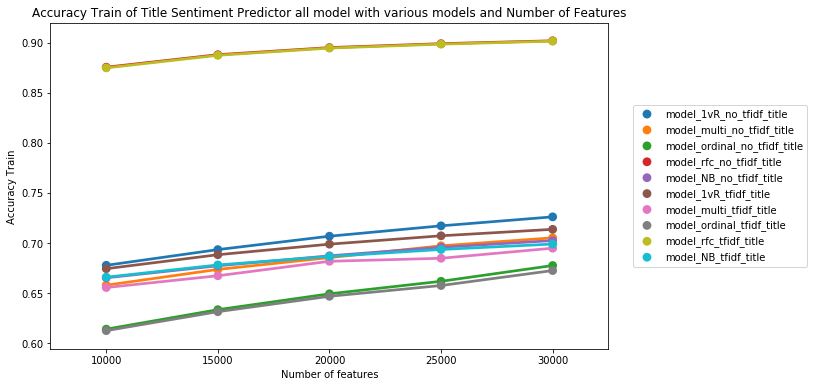

In [29]:
plt.figure(figsize = (10,6))
sns.pointplot(x = 'Number of features', y = 'Accuracy Train', hue = 'Model', data = feature_error_multi_title)
plt.title('Accuracy Train of Title Sentiment Predictor all model with various models and Number of Features')
plt.legend(bbox_to_anchor=[1.20, 0.5], loc ='center')

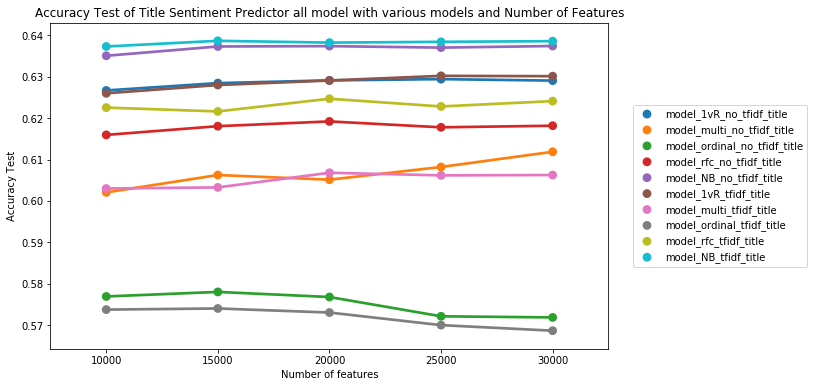

In [30]:
plt.figure(figsize = (10,6))
sns.pointplot(x = 'Number of features', y = 'Accuracy Test', hue = 'Model', data = feature_error_multi_title)
plt.title('Accuracy Test of Title Sentiment Predictor all model with various models and Number of Features')
plt.legend(bbox_to_anchor=[1.20, 0.5], loc ='center')

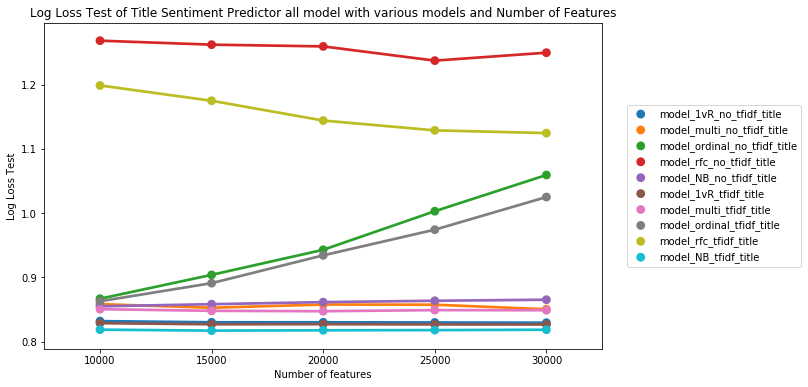

In [31]:
plt.figure(figsize = (10,6))
sns.pointplot(x = 'Number of features', y = 'Log Loss Test', hue = 'Model', data = feature_error_multi_title)
plt.title('Log Loss Test of Title Sentiment Predictor all model with various models and Number of Features')
plt.legend(bbox_to_anchor=[1.20, 0.5], loc ='center')

In [32]:
feature_error_multi_review = pd.concat([create_error_feature_df_notfidf_multi(feature_no_tfidf_review_sentiment_multi, name = 'review'),
                                      create_error_feature_df_tfidf_multi(feature_tfidf_review_sentiment_multi, name = 'review')   ])

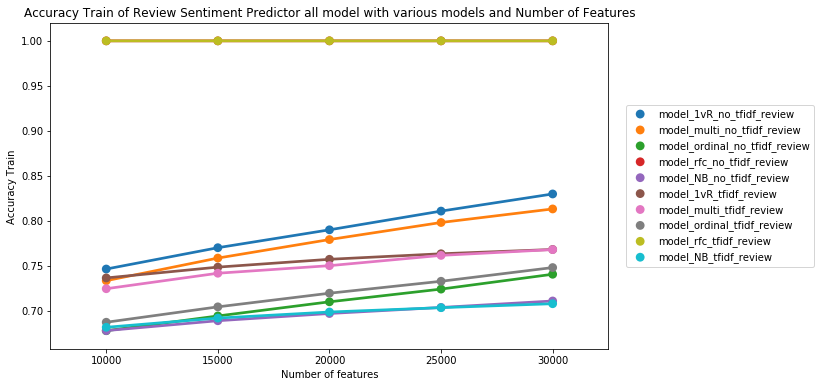

In [33]:
plt.figure(figsize = (10,6))
sns.pointplot(x = 'Number of features', y = 'Accuracy Train', hue = 'Model', data = feature_error_multi_review)
plt.title('Accuracy Train of Review Sentiment Predictor all model with various models and Number of Features')
plt.legend(bbox_to_anchor=[1.20, 0.5], loc ='center')

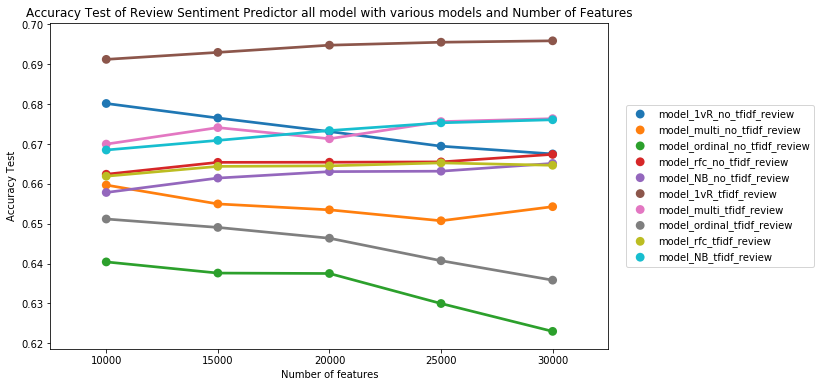

In [34]:
plt.figure(figsize = (10,6))
sns.pointplot(x = 'Number of features', y = 'Accuracy Test', hue = 'Model', data = feature_error_multi_review)
plt.title('Accuracy Test of Review Sentiment Predictor all model with various models and Number of Features')
plt.legend(bbox_to_anchor=[1.20, 0.5], loc ='center')

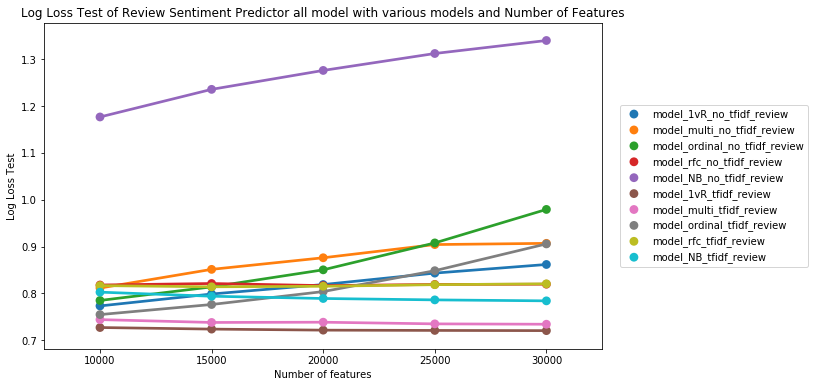

In [35]:
plt.figure(figsize = (10,6))
sns.pointplot(x = 'Number of features', y = 'Log Loss Test', hue = 'Model', data = feature_error_multi_review)
plt.title('Log Loss Test of Review Sentiment Predictor all model with various models and Number of Features')
plt.legend(bbox_to_anchor=[1.20, 0.5], loc ='center')

In [36]:
feature_error_multi_combination = pd.concat([create_error_feature_df_notfidf_multi(feature_no_tfidf_combination_sentiment_multi, name = 'combination'),
                                      create_error_feature_df_tfidf_multi(feature_tfidf_combination_sentiment_multi, name = 'combination')   ])

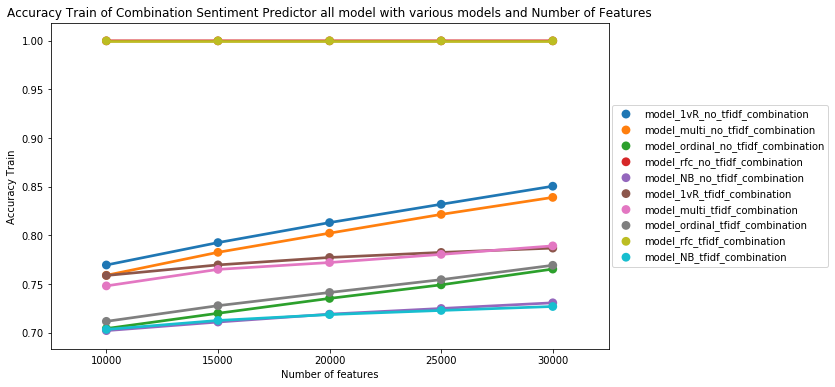

In [37]:
plt.figure(figsize = (10,6))
sns.pointplot(x = 'Number of features', y = 'Accuracy Train', hue = 'Model', data = feature_error_multi_combination)
plt.title('Accuracy Train of Combination Sentiment Predictor all model with various models and Number of Features')
plt.legend(bbox_to_anchor=[1.20, 0.5], loc ='center')

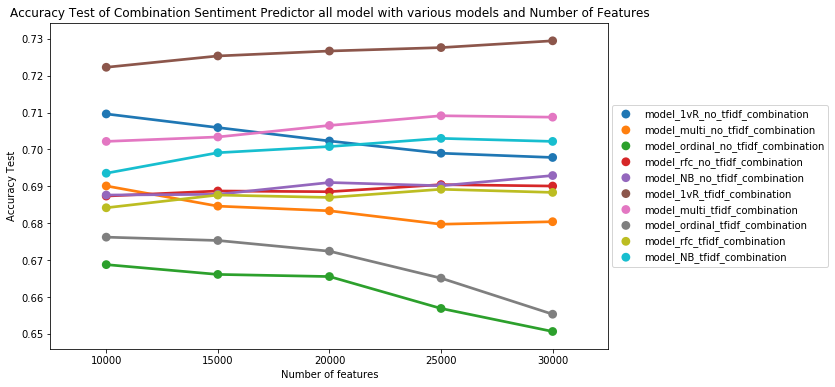

In [38]:
plt.figure(figsize = (10,6))
sns.pointplot(x = 'Number of features', y = 'Accuracy Test', hue = 'Model', data = feature_error_multi_combination)
plt.title('Accuracy Test of Combination Sentiment Predictor all model with various models and Number of Features')
plt.legend(bbox_to_anchor=[1.20, 0.5], loc ='center')

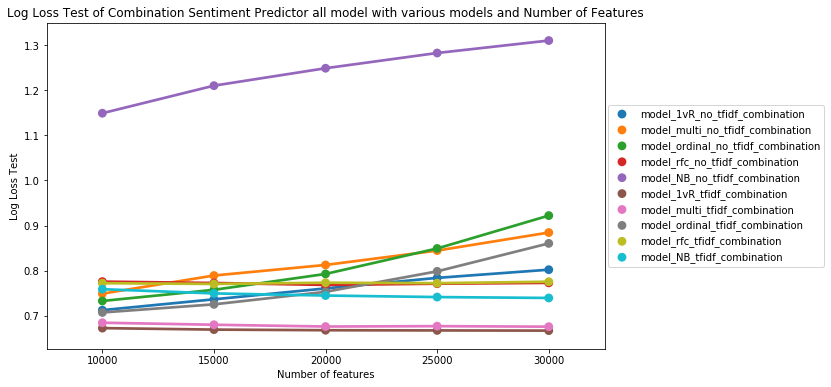

In [39]:
plt.figure(figsize = (10,6))
sns.pointplot(x = 'Number of features', y = 'Log Loss Test', hue = 'Model', data = feature_error_multi_combination)
plt.title('Log Loss Test of Combination Sentiment Predictor all model with various models and Number of Features')
plt.legend(bbox_to_anchor=[1.20, 0.5], loc ='center')

In [40]:
feature_error = pd.concat([feature_error_multi_review,feature_error_multi_review,feature_error_multi_combination])

C:\Users\MSI\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


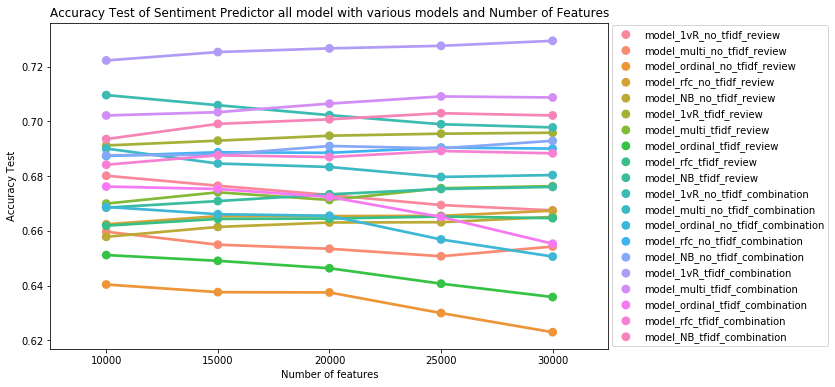

In [41]:
plt.figure(figsize = (10,6))
sns.pointplot(x = 'Number of features', y = 'Accuracy Test', hue = 'Model', data = feature_error)
plt.title('Accuracy Test of Sentiment Predictor all model with various models and Number of Features')
plt.legend(bbox_to_anchor=[1.20, 0.5], loc ='center')

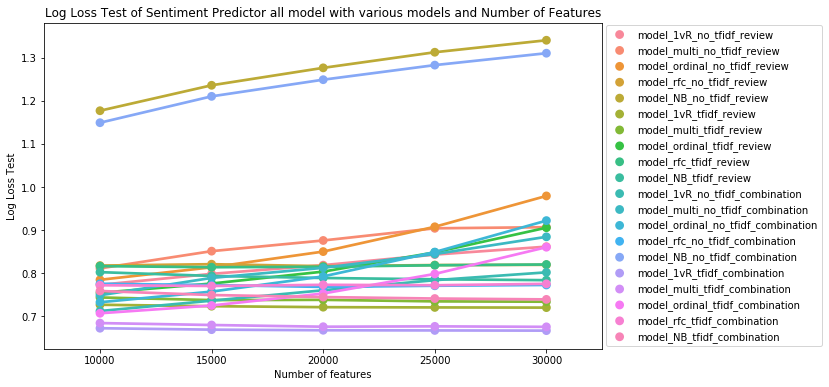

In [42]:
plt.figure(figsize = (10,6))
sns.pointplot(x = 'Number of features', y = 'Log Loss Test', hue = 'Model', data = feature_error)
plt.title('Log Loss Test of Sentiment Predictor all model with various models and Number of Features')
plt.legend(bbox_to_anchor=[1.20, 0.5], loc ='center')

## Using word with the stopwords without the punctuation

## Trying with even more number of features

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, log_loss
from sklearn.model_selection import train_test_split

In [44]:
model_1vR = LogisticRegression(multi_class='ovr', class_weight='balanced')

In [45]:
amazon = pd.read_csv('amazon_5_percent.csv')
def sentiment(rating):
    if (rating == 1) or (rating == 2):
        return 'Negative'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Positive'
amazon['Sentiment'] = amazon['Rating'].apply(sentiment)
def all_word(word):
    letters_only = re.sub("[^a-zA-Z]", " ", word)
    words = letters_only.lower().split()
    return (" ".join(words))

amazon['Title_no_punc'] = amazon['Title'].apply(all_word)
amazon['Review_no_punc'] = amazon['Review'].apply(all_word)

stops = list(stopwords.words('english'))
stops.extend(['book', 'product', 'movie', 'music', 'album', 'cd', 'one'])
stops = set(stops)


def meaningful_word_specific(word):
    words = word.split()   
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words ))

amazon['Title_meaningful'] = amazon['Title_no_punc'].apply(meaningful_word_specific)
amazon['Review_meaningful'] = amazon['Review_no_punc'].apply(meaningful_word_specific)

amazon['Combination'] = amazon[['Title_meaningful', 'Review_meaningful']].apply(lambda x:(x['Title_meaningful'] +' '+ x['Review_meaningful']) , axis = 1)

KeyboardInterrupt: 

In [ ]:
def calc_train_error(X_train, y_train, model):
    predictions = model.predict(X_train)
    predictProba = model.predict_proba(X_train)
    f1 = f1_score(y_train, predictions, average ='macro')
    report = classification_report(y_train, predictions)
    accuracy = accuracy_score(y_train, predictions)
    confMatrix = confusion_matrix(y_train, predictions)
    logloss = log_loss(y_train,predictProba)
    return{
        'report' : report, 
        'f1' : f1,
        'accuracy': accuracy,
        'confusion': confMatrix,
        'logloss' : logloss
    }
def calc_validation_error(X_test, y_test, model):
    predictions = model.predict(X_test)
    predictProba = model.predict_proba(X_test)
    f1 = f1_score(y_test, predictions, average ='macro')
    report = classification_report(y_test, predictions)
    accuracy = accuracy_score(y_test, predictions)
    confMatrix = confusion_matrix(y_test, predictions)
    logloss = log_loss(y_test,predictProba)
    return{
        'report' : report, 
        'f1' : f1,
        'accuracy': accuracy,
        'confusion': confMatrix,
        'logloss' : logloss
    }
def calc_metrics(X_train, y_train, X_test, y_test, model):
    model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model)
    validation_error = calc_validation_error(X_test, y_test, model)
    return train_error, validation_error

In [ ]:
X_train_combination, X_test_combination, y_train_combination, y_test_combination = train_test_split(amazon['Combination'],
                                                                             amazon['Sentiment'], test_size = 0.2)

In [ ]:
model_1vr_feature = []
for num in [35000, 40000, 45000, 50000]:  
    def pipeline_tfidf(X_train, X_test, y_train, y_test):
        train_errors = []
        test_errors = []
        bow_transformer = CountVectorizer(analyzer='word', max_features =num, ngram_range = (1, 2))
        tfidf_transformer = TfidfTransformer()
        X_train = bow_transformer.fit_transform(X_train)
        X_test = bow_transformer.transform(X_test)
        X_train = tfidf_transformer.fit_transform(X_train)
        X_test = tfidf_transformer.transform(X_test)
        
        train_error, test_error = calc_metrics(X_train, y_train, X_test, y_test, model_1vR)
        train_errors.append(train_error)
        test_errors.append(test_error)
        error = {'train_error' : train_errors, 'test_error': test_errors}
        return error
    model_1vr_feature.append(pipeline_tfidf(X_train_combination, X_test_combination, y_train_combination, y_test_combination))


In [ ]:
def create_error_feature_df_tfidf_multi_1vR(df, name =''):
    matrix_feat = [35000, 40000, 45000, 50000]
    matrix_train = []
    matrix_test = []
    model = pd.Series([])
    model_series = pd.Series(['model_1vR_tfidf_{}'.format(name), 
                          'model_1vR_tfidf_{}'.format(name), 
                          'model_1vR_tfidf_{}'.format(name),
                          'model_1vR_tfidf_{}'.format(name)], name = 'Model')
    model = pd.concat([model, model_series])
    for i in range(len(df)):
        
        for k in df[i].keys():
            if k == 'train_error':
                for m in range(len(df[i]['train_error'])):
                    matrix_train.append([df[i]['train_error'][m]['f1'],
                                     df[i]['train_error'][m]['accuracy'], 
                                     df[i]['train_error'][m]['logloss']])
            
            else:
                 for n in range(len(df[i]['test_error'])):
                    matrix_test.append([df[i]['test_error'][n]['f1'],
                                        df[i]['test_error'][n]['accuracy'], 
                                        df[i]['test_error'][n]['logloss']])
                    
    model.index = range(0,4)
    return pd.concat([pd.Series(matrix_feat, name = 'Number of features'), model.rename('Model'),
                       pd.DataFrame(matrix_train, columns = ['F1 Train', 
                                                             'Accuracy Train', 
                                                             'Log Loss Train'
                                                            ]),
                       pd.DataFrame(matrix_test, columns = ['F1 Test', 
                                                            'Accuracy Test', 
                                                            'Log Loss Test'])], axis =1)
onevr_feat = create_error_feature_df_tfidf_multi_1vR(model_1vr_feature, name='Combination')

In [ ]:
onevr_feat